In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [5]:

X,Y = make_classification( n_samples=400, n_classes=2, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=3)

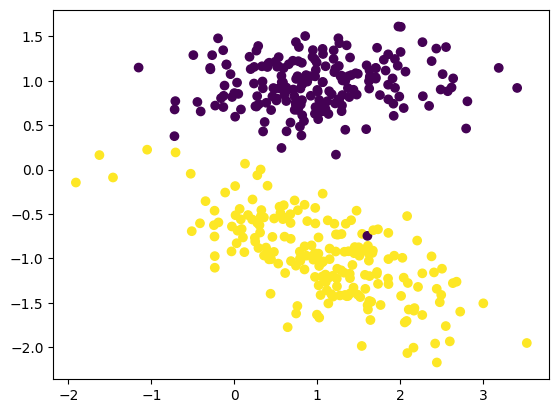

In [6]:
plt.scatter(X[:,0], X[:,1],c=Y)

To find optimal hyperplace

In [17]:
class SVM:
    def __init__(self, C=1.0):
        self.C = C
        self.W = 0
        self.b = 0

    def hingeloss(self, W, Y, X, b):
        loss = 0.0
        loss += (np.dot(W,W.T))/2
        for i in range(X.shape[0]):
            ti = Y[i] * (np.dot(W,X[i].T) + b)
            loss += self.C * max(0, (1-ti))
        return loss[0][0]
    
    def fit(self, X, Y, batch_size = 100, learning_rate = 0.001):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]

        n = learning_rate
        c = self.C

        w = np.zeros((1, no_of_features))
        bias = 0
        print(self.hingeloss(w, Y, X, bias))

        losses = []

        for i in range(300):
            l = self.hingeloss(w,Y,X,bias)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)

            for batch_start in range(0, no_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_start, batch_start+batch_size):
                    if j < no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(w,X[i].T)+bias)
                        if ti>1:
                            pass
                        elif ti<1:
                            gradw+= c*Y[i]*X[i]
                            gradb += c*Y[i]

                w = w - learning_rate*w + learning_rate*gradw
                bias = bias + learning_rate*gradb
            losses.append(l)

        self.W = w
        self.b = bias
        return w, bias, losses






Changing Y zero value to -1 values

In [18]:
Y[Y==0] = -1
Y

array([-1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
       -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,
       -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1,
       -1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,
       -1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,
        1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,
       -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,
        1, -1,  1, -1, -1

In [19]:
mysvm = SVM()
W,B,losses = mysvm.fit(X,Y)

400.0


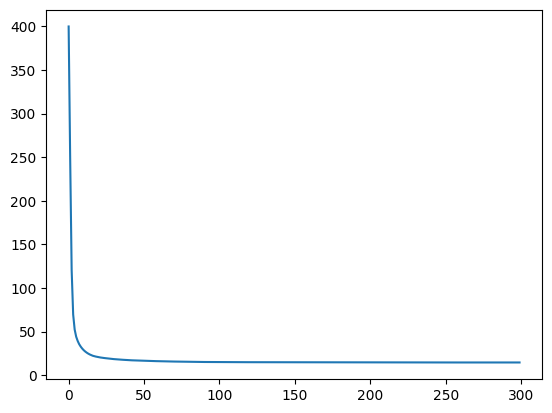

In [20]:
plt.plot(losses)

In [31]:
def pltohyperplane(w1,w2,bias):
    plt.figure(figsize=(12,12))
    X1 = np.linspace(-2,4,10)
    X2 = -(w1*X1 + bias)/w2

    plt.plot(X1,X2)
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.show()

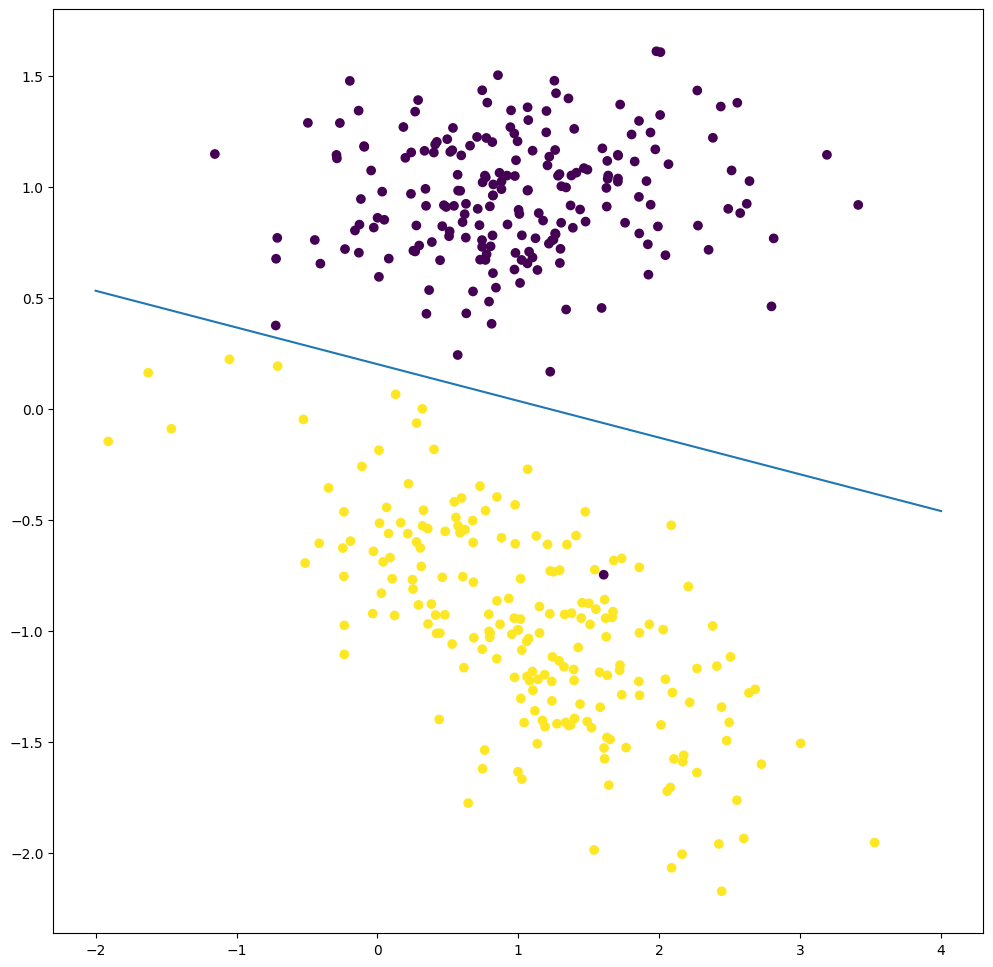

In [32]:

pltohyperplane(W[0,0], W[0,1], B)